<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Module 2 - Adversarial Search</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

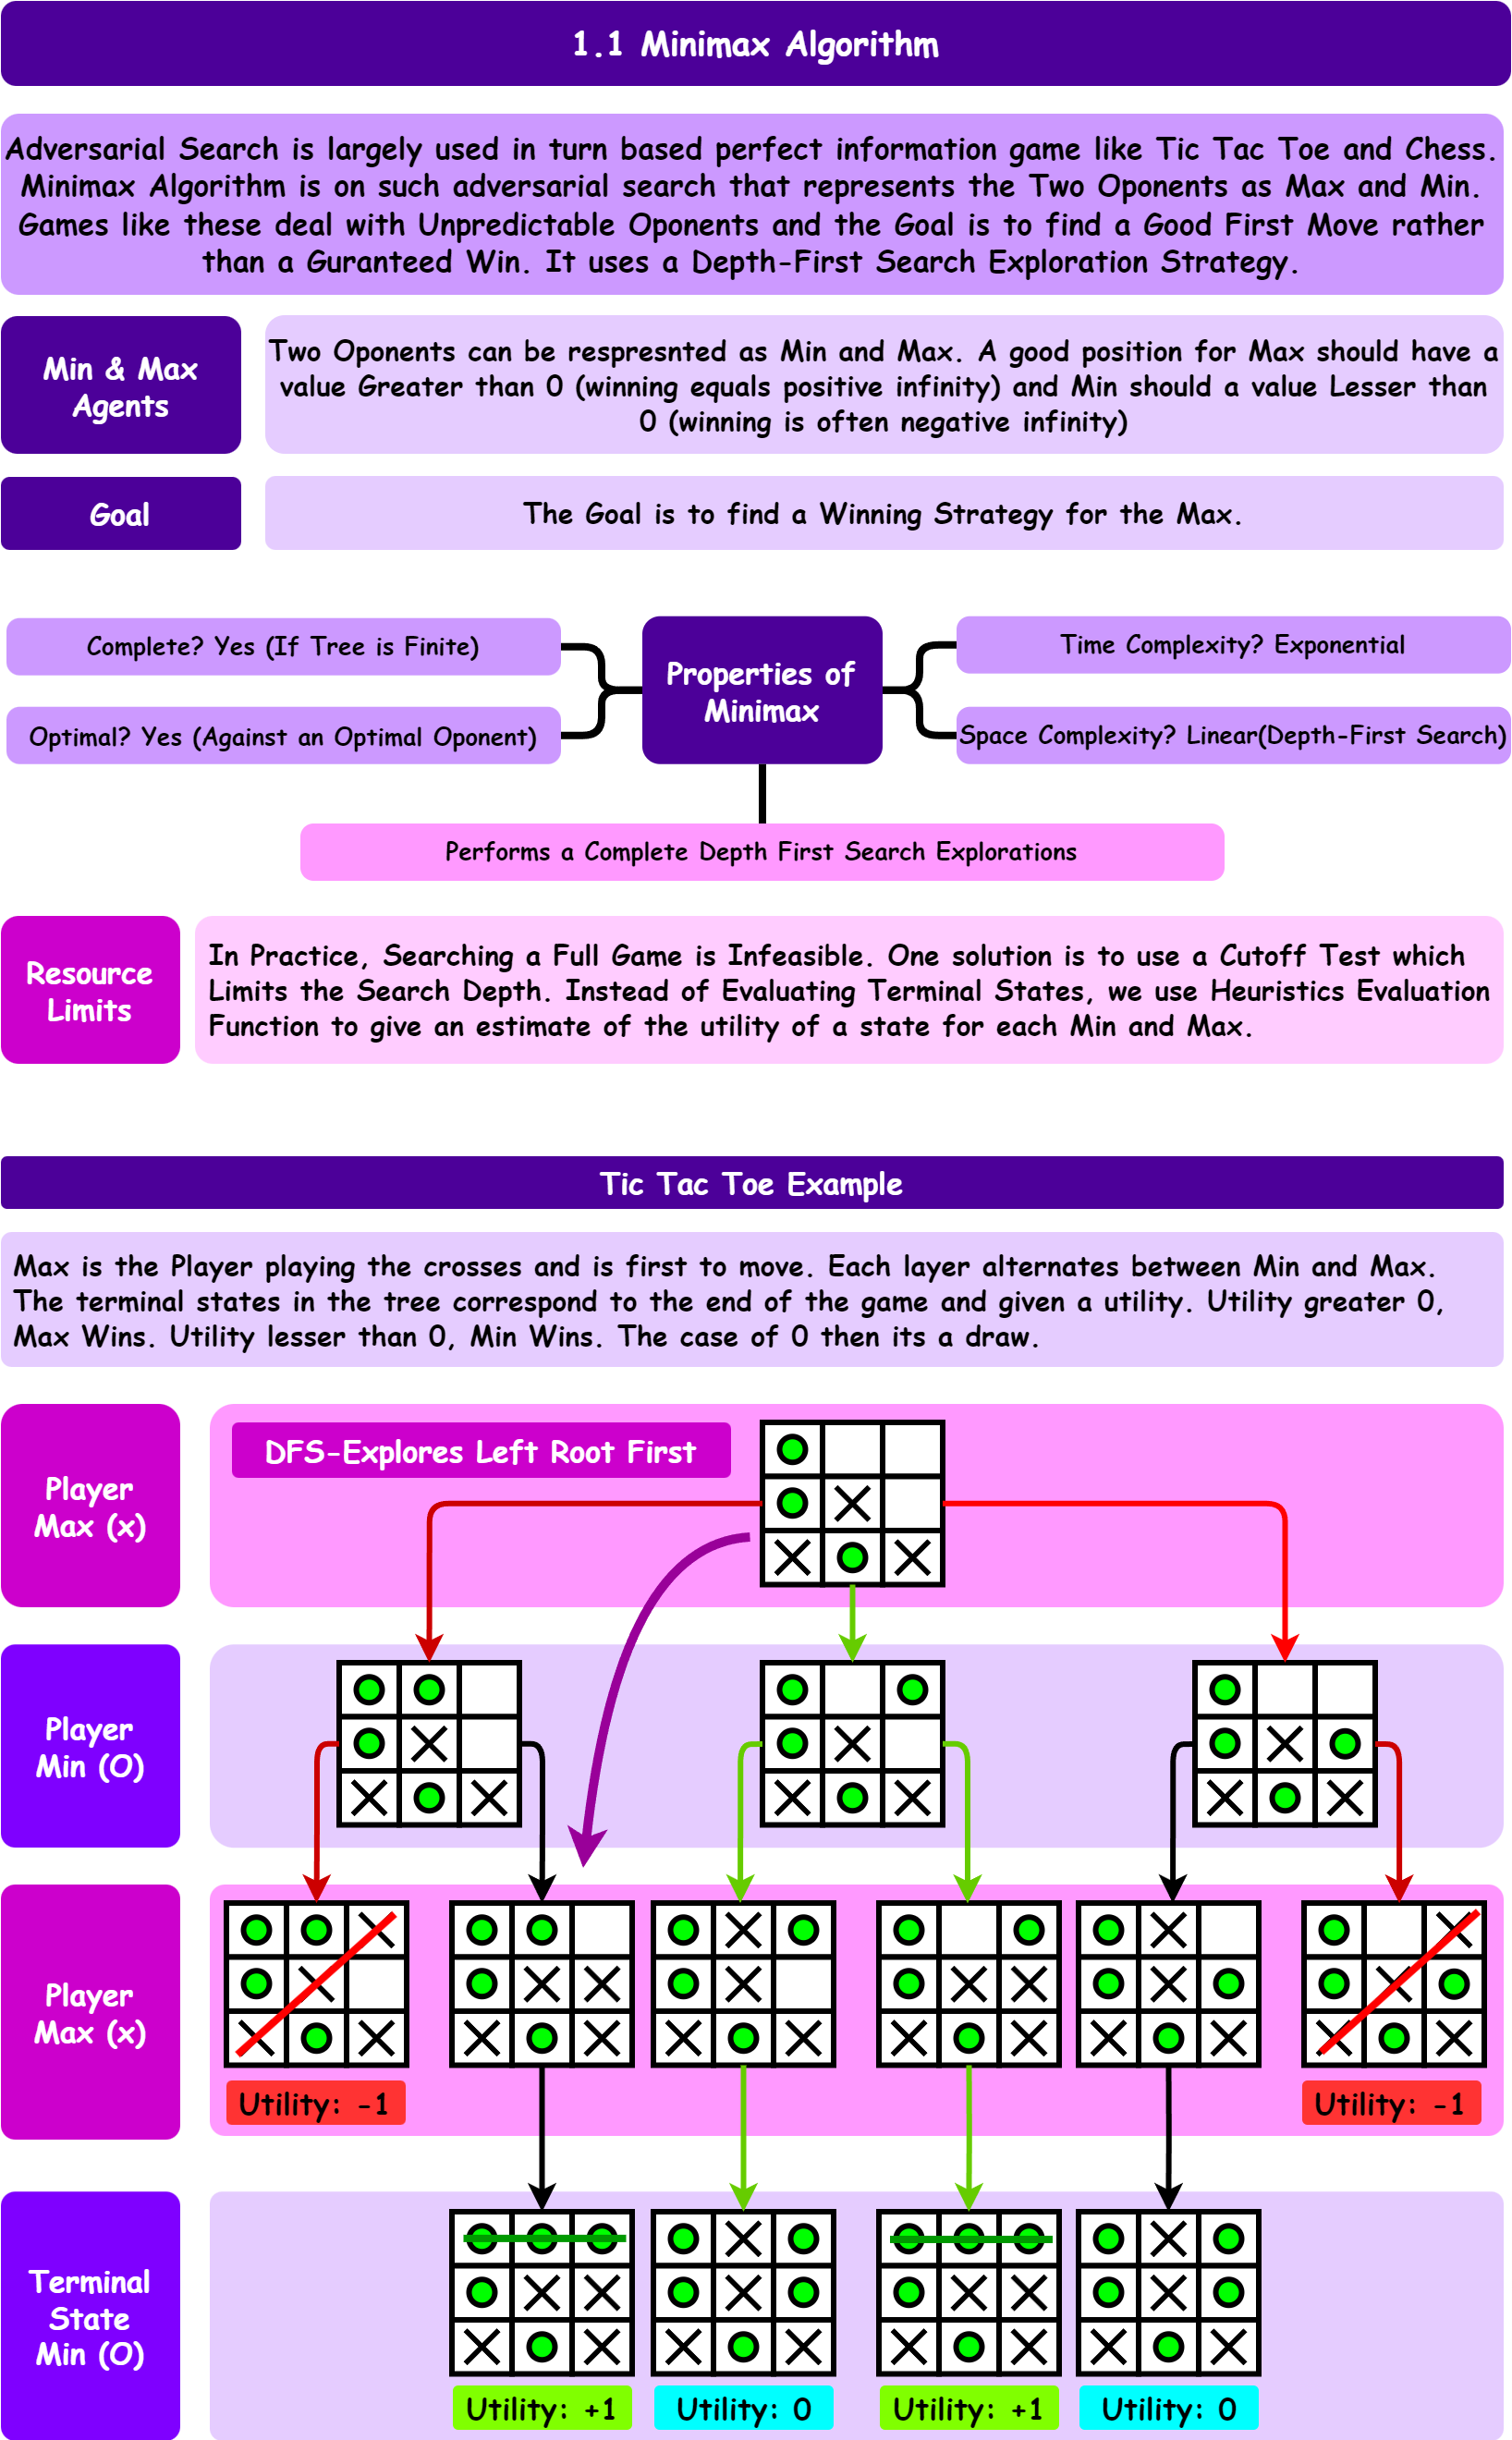

<br><br>

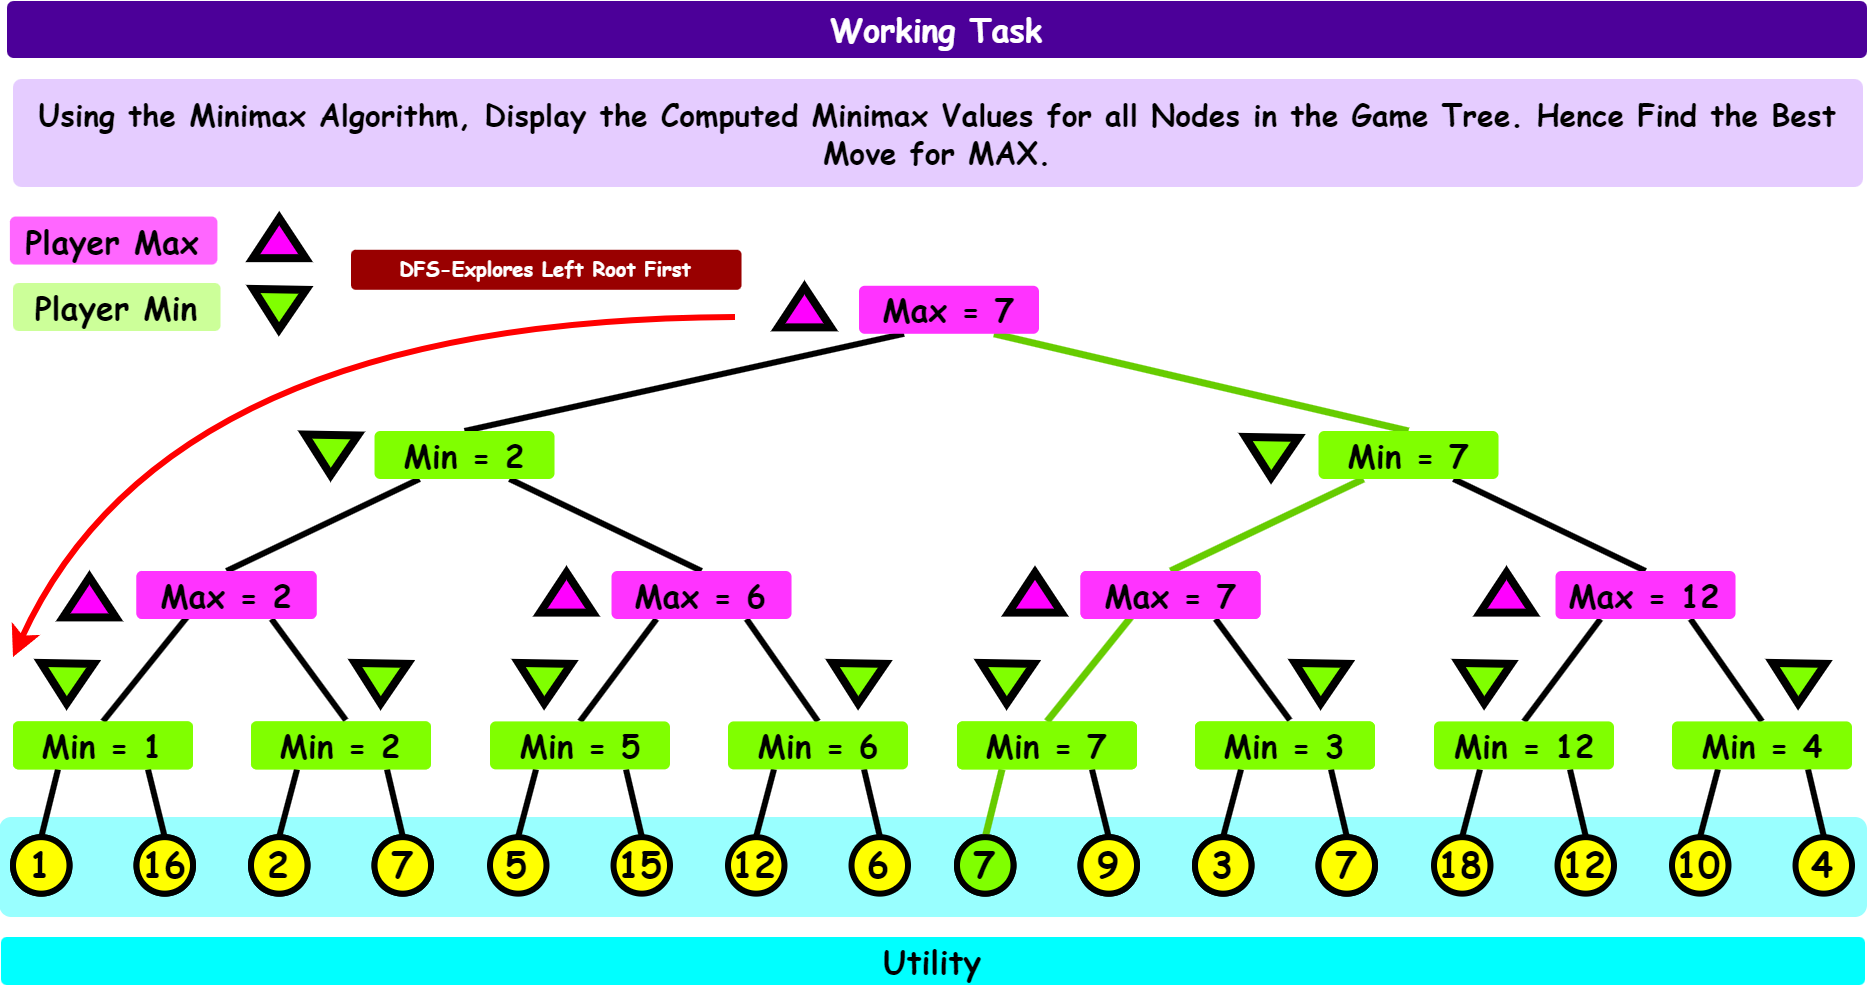

In [ ]:
# Using the Minimax Algorithm, Display the Computed Minimax Values for all Nodes in the Game Tree. 
# Hence Find the Best Move for MAX.
#
# Based on: Artificial Intelligence: a Modern Approach, Global Edition
# by Stuart Russell and Peter Norvig
# Pearson Education, Limited, 2021-05-20
#
# Pseudocode:
# function MINIMAX-SEARCH(game, state) returns an action
#   player ← game.TO-MOVE(state)
#   value, move ← MAX-VALUE(game, state)
#   return move
#
# function MAX-VALUE(game, state) returns a (utility, move) pair
#   if game.IS-TERMINAL(state) then return game.UTILITY(state, player), null
#   v, move ← −∞
#   for each a in game.ACTIONS(state) do
#     v2, a2 ← MIN-VALUE(game, game.RESULT(state, a))
#     if v2 > v then
#       v, move ← v2, a
#   return v, move
#
# function MIN-VALUE(game, state) returns a (utility, move) pair
#   if game.IS-TERMINAL(state) then return game.UTILITY(state, player), null
#   v, move ← +∞
#   for each a in game.ACTIONS(state) do
#     v2, a2 ← MAX-VALUE(game, game.RESULT(state, a))
#     if v2 < v then
#       v, move ← v2, a
#   return v, move

def minimax_search(game, state):
    # function MINIMAX-SEARCH(game, state) returns an action
    player = game.to_move(state)
    value, move = max_value(game, state)
    return move

def max_value(game, state):
    # function MAX-VALUE(game, state) returns a (utility, move) pair
    if game.is_terminal(state):
        return game.utility(state, game.to_move(state)), None
    
    v = float('-inf')
    move = None
    
    for a in game.actions(state):
        v2, a2 = min_value(game, game.result(state, a))
        if v2 > v:
            v, move = v2, a
    
    return v, move

def min_value(game, state):
    # function MIN-VALUE(game, state) returns a (utility, move) pair
    if game.is_terminal(state):
        return game.utility(state, game.to_move(state)), None
    
    v = float('inf')
    move = None
    
    for a in game.actions(state):
        v2, a2 = max_value(game, game.result(state, a))
        if v2 < v:
            v, move = v2, a
    
    return v, move

---

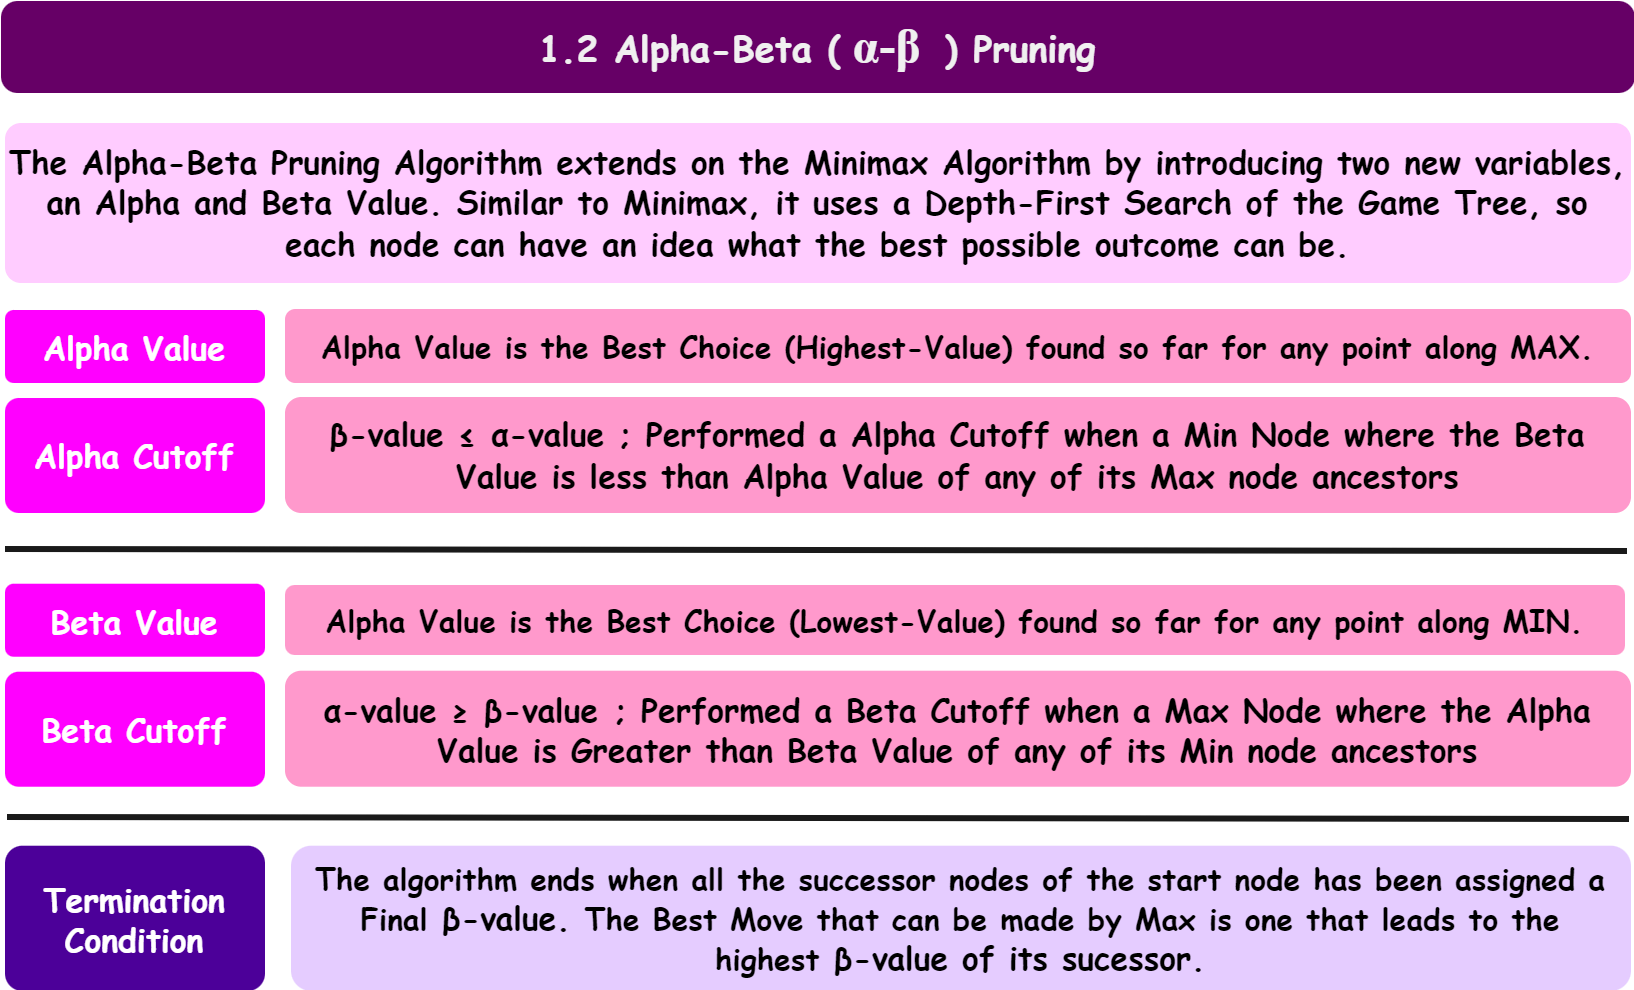

<br><br>

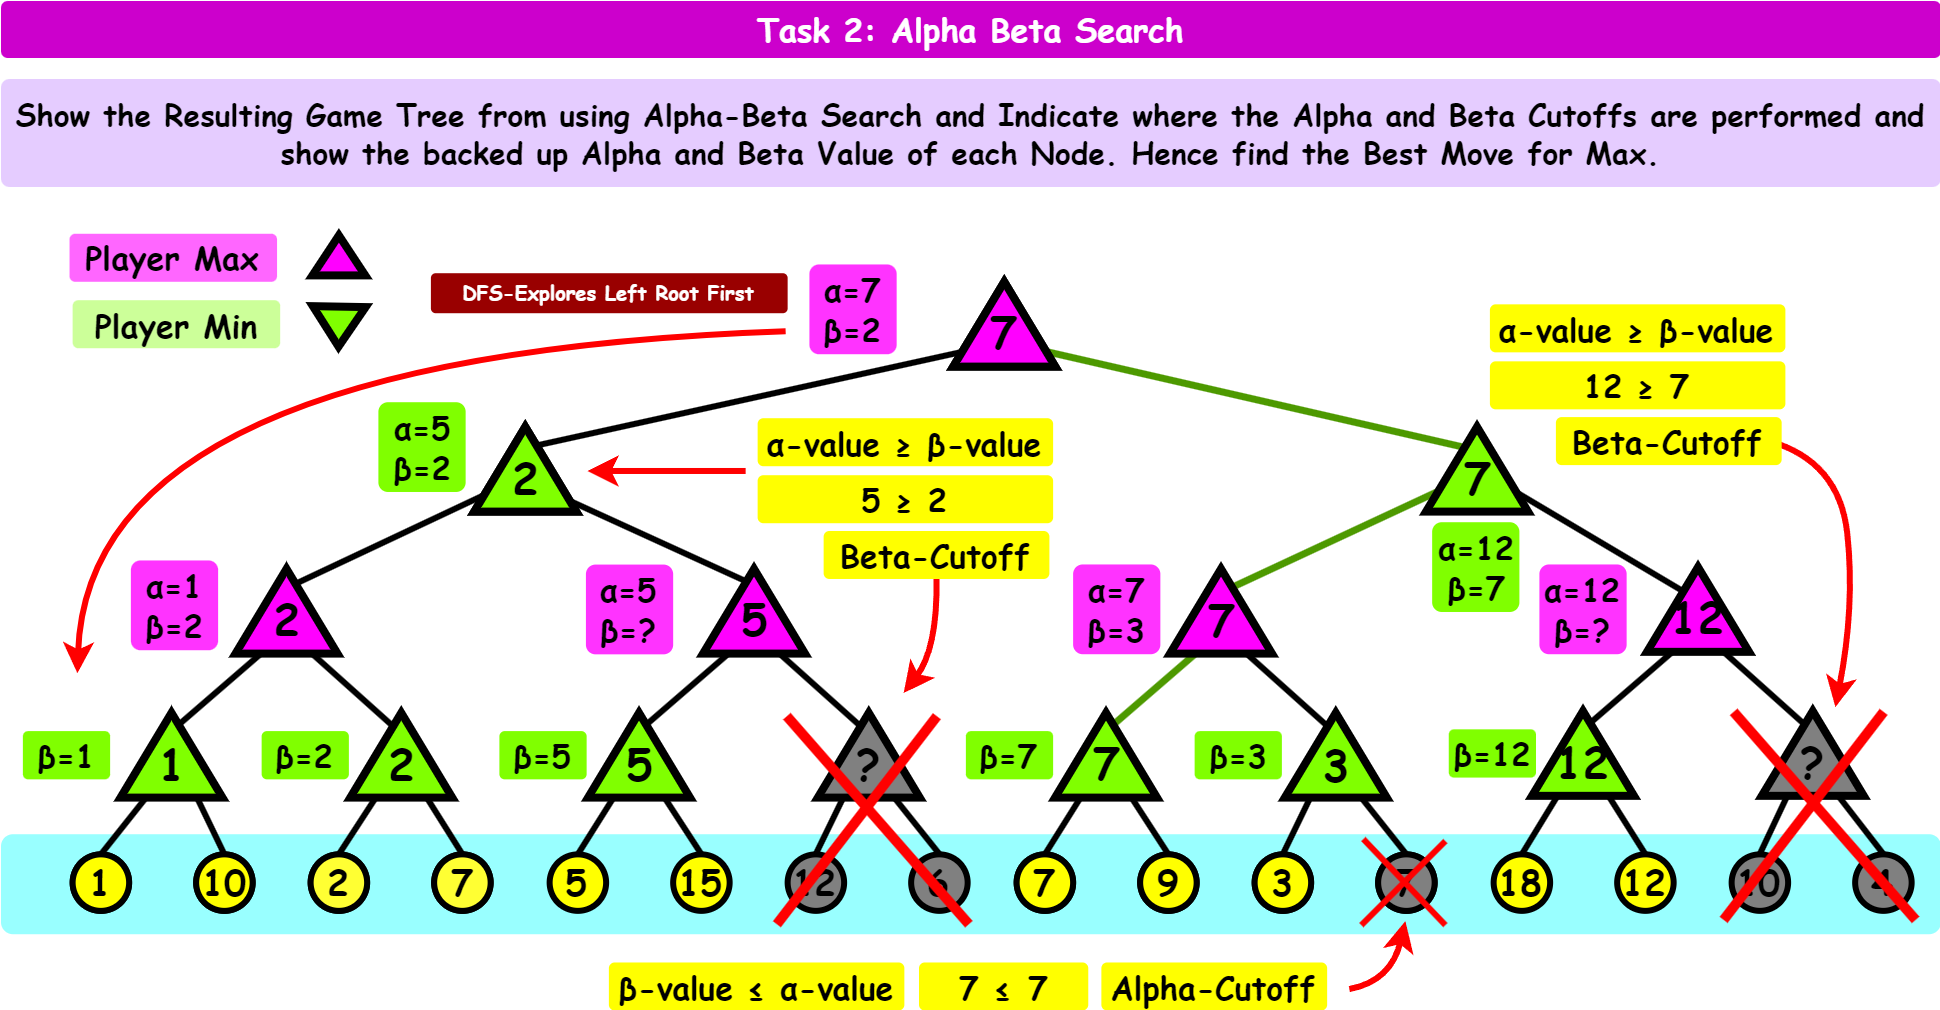

In [ ]:
# Alpha-Beta Search Algorithm - An optimized version of Minimax that prunes branches
# that cannot affect the final decision, reducing the search space significantly.
#
# Based on: Artificial Intelligence: a Modern Approach, Global Edition
# by Stuart Russell and Peter Norvig
# Pearson Education, Limited, 2021-05-20
#
# Pseudocode:
# function ALPHA-BETA-SEARCH(game, state) returns an action
#   player ← game.TO-MOVE(state)
#   value, move ← MAX-VALUE(game, state, −∞, +∞)
#   return move
#
# function MAX-VALUE(game, state, α, β) returns a (utility, move) pair
#   if game.IS-TERMINAL(state) then return game.UTILITY(state, player), null
#   v ← −∞
#   for each a in game.ACTIONS(state) do
#     v2, a2 ← MIN-VALUE(game, game.RESULT(state, a), α, β)
#     if v2 > v then
#       v, move ← v2, a
#       α ← MAX(α, v)
#     if v ≥ β then return v, move
#   return v, move
#
# function MIN-VALUE(game, state, α, β) returns a (utility, move) pair
#   if game.IS-TERMINAL(state) then return game.UTILITY(state, player), null
#   v ← +∞
#   for each a in game.ACTIONS(state) do
#     v2, a2 ← MAX-VALUE(game, game.RESULT(state, a), α, β)
#     if v2 < v then
#       v, move ← v2, a
#       β ← MIN(β, v)
#     if v ≤ α then return v, move
#   return v, move

def alpha_beta_search(game, state):
    # function ALPHA-BETA-SEARCH(game, state) returns an action
    player = game.to_move(state)
    value, move = max_value(game, state, float('-inf'), float('inf'))
    return move

def max_value(game, state, alpha, beta):
    # function MAX-VALUE(game, state, α, β) returns a (utility, move) pair
    if game.is_terminal(state):
        return game.utility(state, game.to_move(state)), None
    
    v = float('-inf')
    move = None
    
    for a in game.actions(state):
        v2, a2 = min_value(game, game.result(state, a), alpha, beta)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            return v, move  # beta cutoff
    
    return v, move

def min_value(game, state, alpha, beta):
    # function MIN-VALUE(game, state, α, β) returns a (utility, move) pair
    if game.is_terminal(state):
        return game.utility(state, game.to_move(state)), None
    
    v = float('inf')
    move = None
    
    for a in game.actions(state):
        v2, a2 = max_value(game, game.result(state, a), alpha, beta)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha:
            return v, move  # alpha cutoff
    
    return v, move
